In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans


In [ ]:
#!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0.2
    Uninstalling multimethod-2.0.2:
      Successfully uninstalled multimethod-2.0.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [ ]:
data = pd.read_csv('/content/Cust_Segmentation.csv')

In [ ]:
data.shape

(850, 10)

In [ ]:
data.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0          0  NBA001              6.3  
1          0  NBA021             12.8  
2          1  NBA013             20.9  
3          0  NBA009              6.3  
4          0  NBA008              7.2

In [ ]:
data['Address'].apply(lambda x : x[3:]).value_counts()

Address
001    71
002    71
000    60
004    58
003    55
006    50
008    49
009    45
005    43
007    41
010    37
011    36
012    28
014    24
013    22
016    22
017    20
015    18
019    16
018    14
023    11
021    10
026    10
022     9
025     9
020     8
024     4
027     4
031     2
030     1
034     1
029     1
Name: count, dtype: int64

In [ ]:
data['Address_group'] = data['Address'].apply(lambda x : x[3:])

In [ ]:
data

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0              1   41    2               6      19      0.124       1.073   
1              2   47    1              26     100      4.582       8.218   
2              3   33    2              10      57      6.111       5.802   
3              4   29    2               4      19      0.681       0.516   
4              5   47    1              31     253      9.308       8.908   
..           ...  ...  ...             ...     ...        ...         ...   
845          846   27    1               5      26      0.548       1.220   
846          847   28    2               7      34      0.359       2.021   
847          848   25    4               0      18      2.802       3.210   
848          849   32    1              12      28      0.116       0.696   
849          850   52    1              16      64      1.866       3.638   

     Defaulted Address  DebtIncomeRatio Address_group  
0            0  NBA001              6.3           001  
1            0  NBA021             12.8           021  
2            1  NBA013             20.9           013  
3            0  NBA009              6.3           009  
4            0  NBA008              7.2           008  
..         ...     ...              ...           ...  
845          0  NBA007              6.8           007  
846          0  NBA002              7.0           002  
847          1  NBA001             33.4           001  
848          0  NBA012              2.9           012  
849          0  NBA025              8.6           025  

[850 rows x 11 columns]

In [ ]:
data.isna().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
Address_group      0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 59.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data = data.drop(columns = ['Customer Id', 'Address_group' ])

In [ ]:
data.select_dtypes(include= 'object')

data_address_onehot = pd.get_dummies(data.select_dtypes(include= 'object'), dtype=int)

In [ ]:
data_onehot = pd.concat([data, data_address_onehot], axis = 1 )
data_onehot = pd.concat([data], axis = 1 )

In [ ]:
data_processed = data_onehot.drop(columns = ['Address','kmeans_cluster_num'])

In [ ]:
data_processed

Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted  \
0     41    2               6      19      0.124       1.073          0   
1     47    1              26     100      4.582       8.218          0   
2     33    2              10      57      6.111       5.802          1   
3     29    2               4      19      0.681       0.516          0   
4     47    1              31     253      9.308       8.908          0   
..   ...  ...             ...     ...        ...         ...        ...   
845   27    1               5      26      0.548       1.220          0   
846   28    2               7      34      0.359       2.021          0   
847   25    4               0      18      2.802       3.210          1   
848   32    1              12      28      0.116       0.696          0   
849   52    1              16      64      1.866       3.638          0   

     DebtIncomeRatio  
0                6.3  
1               12.8  
2               20.9  
3                6.3  
4                7.2  
..               ...  
845              6.8  
846              7.0  
847             33.4  
848              2.9  
849              8.6  

[850 rows x 8 columns]

In [ ]:
scaling = StandardScaler()

In [ ]:
data_processed_scaling = pd.DataFrame(scaling.fit_transform(data_processed), columns = data_processed.columns)

In [ ]:
data_processed_scaling

Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
0    0.742915  0.312122       -0.378790 -0.718459  -0.683811   -0.590489   
1    1.489490 -0.766349        2.573721  1.384325   1.414474    1.512962   
2   -0.252518  0.312122        0.211712  0.268032   2.134141    0.801704   
3   -0.750235  0.312122       -0.674041 -0.718459  -0.421643   -0.754467   
4    1.489490 -0.766349        3.311849  5.356249   3.638900    1.716094   
..        ...       ...             ...       ...        ...         ...   
845 -0.999093 -0.766349       -0.526415 -0.536737  -0.484243   -0.547213   
846 -0.874664  0.312122       -0.231164 -0.329054  -0.573202   -0.311403   
847 -1.247951  2.469066       -1.264543 -0.744419   0.576666    0.038633   
848 -0.376947 -0.766349        0.506963 -0.484816  -0.687577   -0.701476   
849  2.111636 -0.766349        1.097466  0.449754   0.136111    0.164634   

     Defaulted  DebtIncomeRatio  
0    -0.523797        -0.576525  
1    -0.523797         0.391387  
2     1.909138         1.597554  
3    -0.523797        -0.576525  
4    -0.523797        -0.442507  
..         ...              ...  
845  -0.523797        -0.502070  
846  -0.523797        -0.472288  
847   1.909138         3.458923  
848  -0.523797        -1.082817  
849  -0.523797        -0.234033  

[850 rows x 8 columns]

In [ ]:
data_processed_scaling.shape

(850, 8)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans.fit(data_processed_scaling)

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans.cluster_centers_

array([[-1.49558091e-01, -1.14064018e-01, -1.34481828e-01,
        -2.72413651e-01, -3.35659257e-01, -3.69866734e-01,
        -5.23796543e-01, -3.24345859e-01],
       [-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
        -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
         1.87982575e+00,  5.69270845e-01],
       [ 1.00292949e+00,  2.37745062e-01,  1.27767064e+00,
         1.45504409e+00,  1.24780477e+00,  1.45422700e+00,
        -2.04998195e-01,  5.53954880e-01]])

In [ ]:
kmeans.predict(data_processed_scaling)

array([0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0,

In [ ]:
data

Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted  \
0     41    2               6      19      0.124       1.073          0   
1     47    1              26     100      4.582       8.218          0   
2     33    2              10      57      6.111       5.802          1   
3     29    2               4      19      0.681       0.516          0   
4     47    1              31     253      9.308       8.908          0   
..   ...  ...             ...     ...        ...         ...        ...   
845   27    1               5      26      0.548       1.220          0   
846   28    2               7      34      0.359       2.021          0   
847   25    4               0      18      2.802       3.210          1   
848   32    1              12      28      0.116       0.696          0   
849   52    1              16      64      1.866       3.638          0   

    Address  DebtIncomeRatio  kmeans_cluster_num  
0    NBA001              6.3                   1  
1    NBA021             12.8                   2  
2    NBA013             20.9                   2  
3    NBA009              6.3                   1  
4    NBA008              7.2                   2  
..      ...              ...                 ...  
845  NBA007              6.8                   1  
846  NBA002              7.0                   1  
847  NBA001             33.4                   1  
848  NBA012              2.9                   1  
849  NBA025              8.6                   2  

[850 rows x 10 columns]

In [ ]:
data['kmeans_cluster_num'] = kmeans.predict(data_processed_scaling)

In [ ]:
data.groupby('kmeans_cluster_num').Age.mean()

kmeans_cluster_num
0    33.827458
1    31.891566
2    43.089655
Name: Age, dtype: float64

In [ ]:
data.groupby('kmeans_cluster_num').Edu.mean()

kmeans_cluster_num
0    1.604824
1    1.861446
2    1.931034
Name: Edu, dtype: float64

In [ ]:
data.groupby('kmeans_cluster_num')['Years Employed'].mean()

kmeans_cluster_num
0     7.654917
1     3.963855
2    17.220690
Name: Years Employed, dtype: float64

In [ ]:
data.groupby('kmeans_cluster_num')['Defaulted'].mean()

kmeans_cluster_num
0    0.000000
1    0.987952
2    0.131034
Name: Defaulted, dtype: float64

In [ ]:
data.groupby('kmeans_cluster_num').mean(numeric_only=True)

Age       Edu  Years Employed      Income  \
kmeans_cluster_num                                                    
0                   33.827458  1.604824        7.654917   36.181818   
1                   31.891566  1.861446        3.963855   31.789157   
2                   43.089655  1.931034       17.220690  102.724138   

                    Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
kmeans_cluster_num                                                     
0                    0.863681    1.822410   0.000000         7.993506  
1                    1.576675    2.843355   0.987952        13.994578  
2                    4.227897    8.018490   0.131034        13.891724

In [ ]:
# Cluster 1: High Income Category, High Debt, Experienced, High Educated
# Cluster 2: Young, Least Experienced, Low Income, Low Debt, Low Educated
# Cluster 3: Older, Experienced, Medium Income, Medium Debt, Less Defaulted

In [ ]:
res = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(data_processed_scaling)
  res.append(kmeans.inertia_)


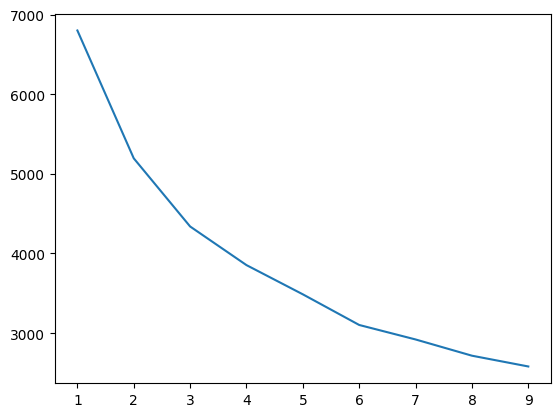

In [ ]:
plt.plot(range(1, 10), res)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_processed_scaling)

KMeans(n_clusters=6, random_state=42)

In [ ]:
data['kmeans_cluster_num'] = kmeans.predict(data_processed_scaling)

In [ ]:
data.groupby('kmeans_cluster_num').mean(numeric_only=True)

Age       Edu  Years Employed      Income  \
kmeans_cluster_num                                                    
0                   41.757764  1.453416       16.621118   72.130435   
1                   31.486111  1.729167        3.541667   28.888889   
2                   33.593023  3.523256        4.906977   44.453488   
3                   46.285714  1.928571       22.642857  213.142857   
4                   39.775701  1.878505       13.224299   68.233645   
5                   31.730769  1.301775        5.742604   28.973373   

                    Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
kmeans_cluster_num                                                     
0                    1.423050    2.820124   0.006211         6.450932  
1                    1.395889    2.400583   1.000000        13.427778  
2                    1.039023    2.411977   0.069767         8.256977  
3                   11.737786   16.239857   0.571429        16.821429  
4                    3.939009    8.106495   0.224299        19.047664  
5                    0.695322    1.523817   0.000000         7.958580

In [ ]:
# Cluster 1: Least Debt To Income Ratio
# Cluster 2: 100% they will default
# Cluster 3: High Educated People
# Cluster 4: High Profile Rich People, Oldest
# Cluster 5: Highest Debt To Income Ratio
# Cluster 6: Young and never default

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print(silhouette_score(data_processed_scaling, kmeans.labels_))

0.24461829828791243
